In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
from pandas import read_csv
from matplotlib import pyplot

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv("sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
# Step 1: Summary Statistics
summary_stats = df.describe()
print(summary_stats)

       Unnamed: 0.1  Unnamed: 0    Retweets       Likes         Year  \
count    732.000000  732.000000  732.000000  732.000000   732.000000   
mean     366.464481  369.740437   21.508197   42.901639  2020.471311   
std      211.513936  212.428936    7.061286   14.089848     2.802285   
min        0.000000    0.000000    5.000000   10.000000  2010.000000   
25%      183.750000  185.750000   17.750000   34.750000  2019.000000   
50%      366.500000  370.500000   22.000000   43.000000  2021.000000   
75%      549.250000  553.250000   25.000000   50.000000  2023.000000   
max      732.000000  736.000000   40.000000   80.000000  2023.000000   

            Month         Day        Hour  
count  732.000000  732.000000  732.000000  
mean     6.122951   15.497268   15.521858  
std      3.411763    8.474553    4.113414  
min      1.000000    1.000000    0.000000  
25%      3.000000    9.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000  

In [43]:
unique_df = df.drop_duplicates(subset=['Platform', 'Country'])

# Display the resulting DataFrame without duplicated values
print(unique_df)

     Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
586           587         591   
590           591         595   
591           592         596   
593           594         598   
601           602         606   

                                                  Text       Sentiment  \
0     Enjoying a beautiful day at the park!        ...      Positive     
1     Traffic was terrible this morning.           ...      Negative     
2     Just finished an amazing workout! 💪          ...      Positive     
3     Excited about the upcoming weekend getaway!  ...      Positive     
4     Trying out a new recipe for dinner tonight.  ...      Neutral      
..                                                 ...             ...   
586  Survived a group project without any drama. Mi...   Satisfaction    
590  Bought

In [55]:
import pandas as pd

# Assuming you have loaded the data into a DataFrame named 'df'
# Group by 'Country' and count the number of posts
country_counts = df.groupby('Country')['Text'].count().reset_index()
country_counts.rename(columns={'Text': 'Total_Posts'}, inplace=True)

# Merge the aggregated information back to the original dataset
df = pd.merge(df, country_counts, on='Country', how='left')

# Display the updated DataFrame
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Polarity,Total_Posts_x,Total_Posts_y
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,[],15.0,30.0,USA,2023,1,15,12,0.750000,12,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,[],5.0,10.0,Canada,2023,1,15,8,-1.000000,7,7
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,[],20.0,40.0,USA,2023,1,15,15,0.750000,4,4
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,[],8.0,15.0,UK,2023,1,15,18,0.468750,8,8
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,[],12.0,25.0,Australia,2023,1,15,19,0.136364,41,41


In [45]:
# Step 3: Correlations (Example: Retweets vs. Likes)
correlation = df[['Retweets', 'Likes']].corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
          Retweets     Likes
Retweets  1.000000  0.998482
Likes     0.998482  1.000000


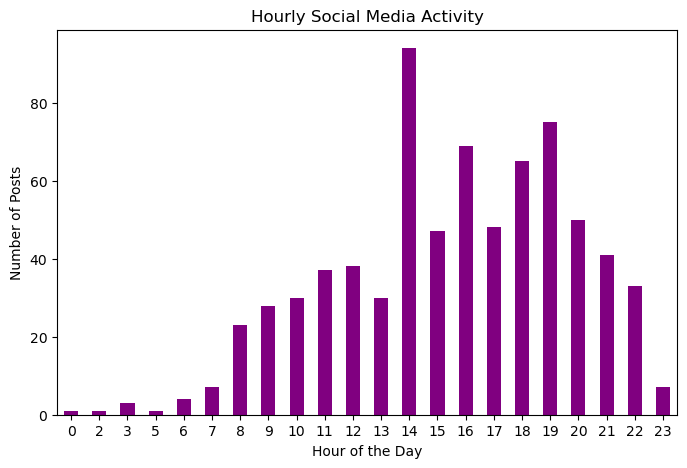

In [46]:
# Step 4: Time Trends (Example: Hourly Activity)
hourly_activity = df.groupby('Hour')['Text'].count()
hourly_activity.plot(kind='bar', color='purple', figsize=(8, 5))
plt.title('Hourly Social Media Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

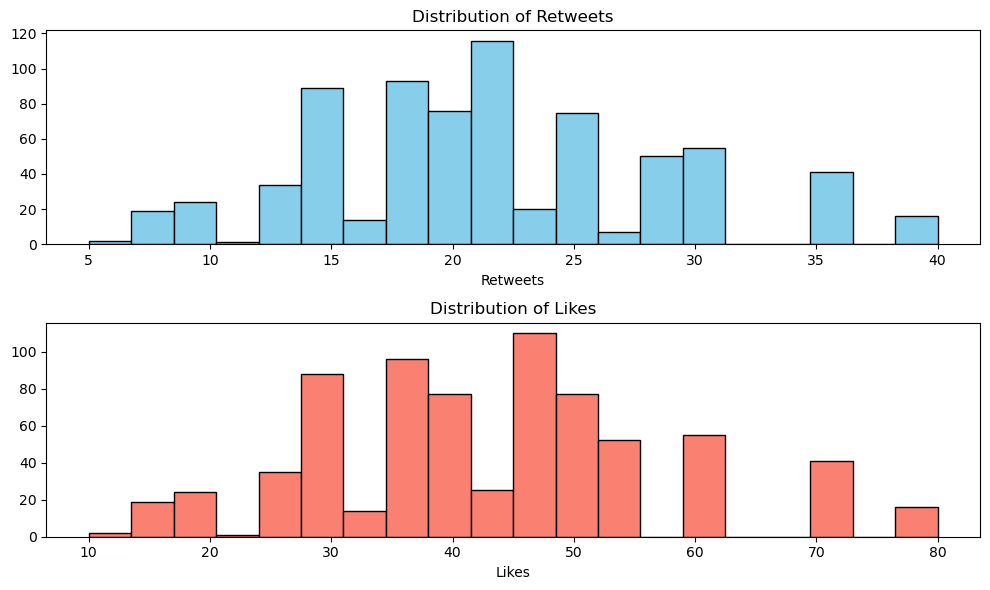

In [47]:
# Step 2: Distributions (Example: Retweets and Likes)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(df['Retweets'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Retweets')
plt.xlabel('Retweets')

plt.subplot(2, 1, 2)
plt.hist(df['Likes'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Likes')
plt.xlabel('Likes')

plt.tight_layout()
plt.show()

In [48]:

# Group by country and calculate total activity (e.g., sum of retweets, likes, etc.)
country_activity = df.groupby('Country')[['Retweets', 'Likes']].sum()

# Find the country with maximum total activity
max_activity_country = country_activity['Retweets'].idxmax()

print(f"The country with the most social media activity is: {max_activity_country}")

The country with the most social media activity is:  USA 


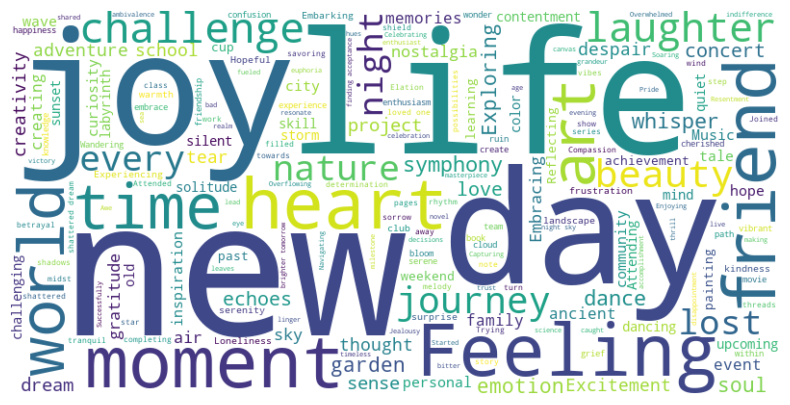

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ''.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment analysis (using NLTK, TextBlob, or VADER)
# Example: TextBlob
from textblob import TextBlob
df['Sentiment_Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

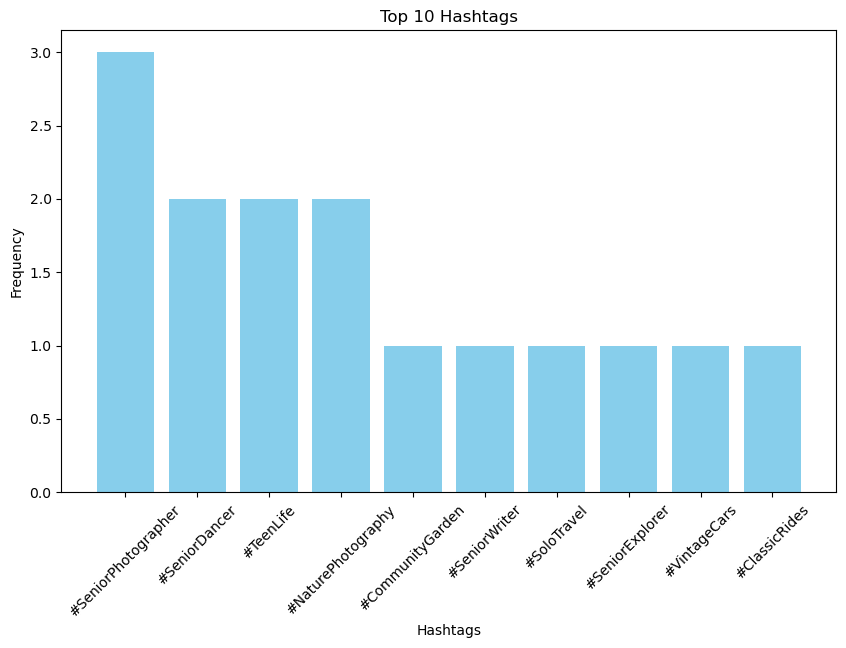

In [50]:
# Assuming you have extracted hashtags into a separate column 'Hashtags'
# Count the frequency of each hashtag
#Question: Which hashtags are most frequently used? Can we visualize the top hashtags?
hashtag_counts = df['Hashtags'].explode().value_counts()

# Visualize the top N hashtags (e.g., bar chart)
top_n = 10
plt.figure(figsize=(10, 6))
plt.bar(hashtag_counts.index[:top_n], hashtag_counts.values[:top_n], color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Hashtags')
plt.xticks(rotation=45)
plt.show()

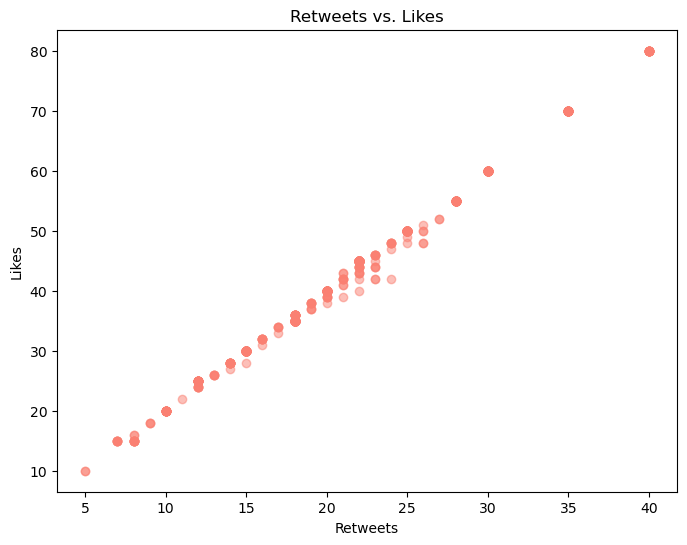

In [51]:
#Question: How do retweets and likes correlate? Are there any outliers?
# Scatter plot to visualize the relationship between retweets and likes
plt.figure(figsize=(8, 6))
plt.scatter(df['Retweets'], df['Likes'], alpha=0.5, color='salmon')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Retweets vs. Likes')
plt.show()

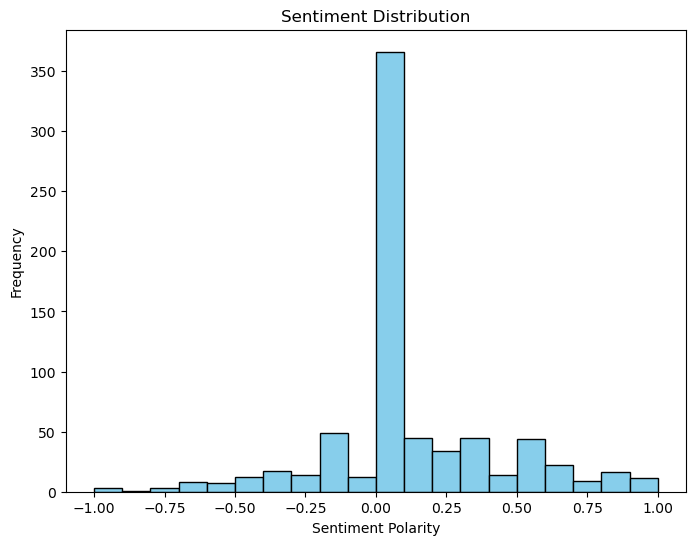

In [52]:
from textblob import TextBlob

# Calculate sentiment polarity for each post
df['Sentiment_Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution (e.g., histogram)
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment_Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

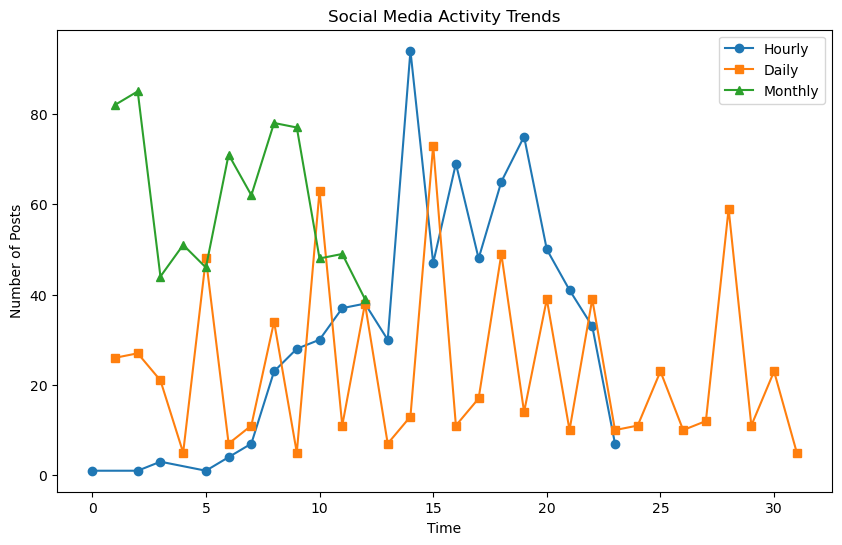

In [53]:
#Question: How does social media activity vary over time (hourly, daily, monthly)? Are there any patterns?
# Group by hour, day, or month and count posts
hourly_activity = df.groupby('Hour')['Text'].count()
daily_activity = df.groupby('Day')['Text'].count()
monthly_activity = df.groupby('Month')['Text'].count()

# Visualize time trends (e.g., line plots)
plt.figure(figsize=(10, 6))
plt.plot(hourly_activity.index, hourly_activity.values, marker='o', label='Hourly')
plt.plot(daily_activity.index, daily_activity.values, marker='s', label='Daily')
plt.plot(monthly_activity.index, monthly_activity.values, marker='^', label='Monthly')
plt.xlabel('Time')
plt.ylabel('Number of Posts')
plt.title('Social Media Activity Trends')
plt.legend()
plt.show()

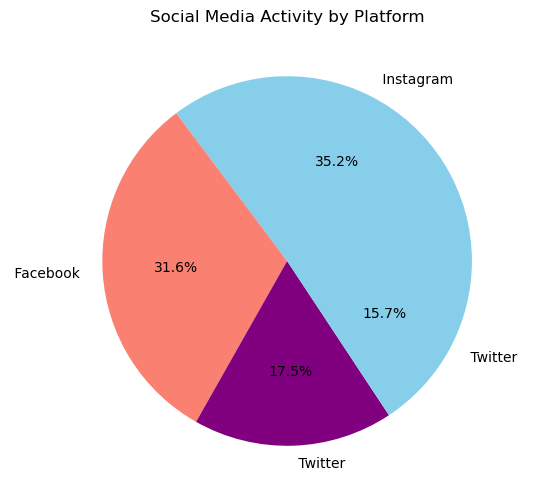

In [54]:
#Question: How does social media activity differ across platforms (Twitter, Instagram, etc.)?
# Group by platform and count posts
platform_counts = df['Platform'].value_counts()

# Visualize platform distribution (e.g., pie chart)
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'purple'])
plt.title('Social Media Activity by Platform')
plt.show()